### Invariant mass

In [ ]:
import uproot
import pandas as pd
import awkward as ak
import numpy as np 
import h5py
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import os

In [44]:
treename= 'events' 

filename = {} 
upfile={}
params={}

filename['Zmuons']= 'data/drellyan_complete_merged.root' # Path to the merged root file
upfile['Zmuons']= uproot.open(f'{filename["Zmuons"]}:{treename}')
params['Zmuons']= upfile['Zmuons'].arrays()

print(params['Zmuons'][0].fields) # BE CAREFUL. The name of the fields is not always the same. It can be personal and is defined in the corresponding Analyzer. 


['numberjet', 'njet_e', 'jet_e', 'njet_pt', 'jet_pt', 'njet_eta', 'jet_eta', 'njet_phi', 'jet_phi', 'njet_ch', 'jet_ch', 'njet_mass', 'jet_mass', 'njet_btag', 'jet_btag', 'njet_hflav', 'jet_hflav', 'njet_corrpt', 'jet_corrpt', 'njet_corrptUp', 'jet_corrptUp', 'njet_corrptDown', 'jet_corrptDown', 'njet_corrptSmearUp', 'jet_corrptSmearUp', 'njet_corrptSmearDown', 'jet_corrptSmearDown', 'njet_corrmass', 'jet_corrmass', 'njet_corre', 'jet_corre', 'njet_corrpx', 'jet_corrpx', 'njet_corrpy', 'jet_corrpy', 'njet_corrpz', 'jet_corrpz', 'btag_Weight', 'btag_WeightUp', 'btag_WeightDn', 'met_e', 'met_pt', 'met_px', 'met_py', 'met_phi', 'met_significance', 'met_rawpt', 'met_rawphi', 'met_rawe', 'numGenPart', 'nGenPart_pt', 'GenPart_pt', 'nGenPart_eta', 'GenPart_eta', 'nGenPart_mass', 'GenPart_mass', 'nGenPart_pdgId', 'GenPart_pdgId', 'nGenPart_phi', 'GenPart_phi', 'nGenPart_px', 'GenPart_px', 'nGenPart_py', 'GenPart_py', 'nGenPart_pz', 'GenPart_pz', 'nGenPart_status', 'GenPart_status', 'nGenPart_m

In [45]:
numbermuon=params['Zmuons']['numbermuon']
muon_e=params['Zmuons']['muon_e']
muon_ch=params['Zmuons']['muon_ch']
muon_pt=params['Zmuons']['muon_pt']
muon_eta=params['Zmuons']['muon_eta']
muon_phi=params['Zmuons']['muon_phi']
numberjet=params['Zmuons']['numberjet']
jet_e=params['Zmuons']['jet_e']
jet_pt=params['Zmuons']['jet_pt']
jet_eta=params['Zmuons']['jet_eta']
jet_phi=params['Zmuons']['jet_phi']
jet_ch=params['Zmuons']['jet_ch']
jet_btag=params['Zmuons']['jet_btag']
met_e=params['Zmuons']['met_e']
met_phi=params['Zmuons']['met_phi']
met_pt=params['Zmuons']['met_pt']

In [46]:
numbermuon = np.array(numbermuon)
numberjet = np.array(numberjet)
index_dimuon = np.where(numbermuon >= 2)[0]    
index_jet = np.where(numberjet >= 1)[0]

In [47]:
dm_imass=[]     #Dimuon invariant mass

for i in index_dimuon:
    imass=(2*muon_pt[i][0]*muon_pt[i][1]*(np.cosh(muon_eta[i][0]-muon_eta[i][1])-np.cos(muon_phi[i][0]-muon_phi[i][1])))**(1/2)
    dm_imass.append(imass)
    

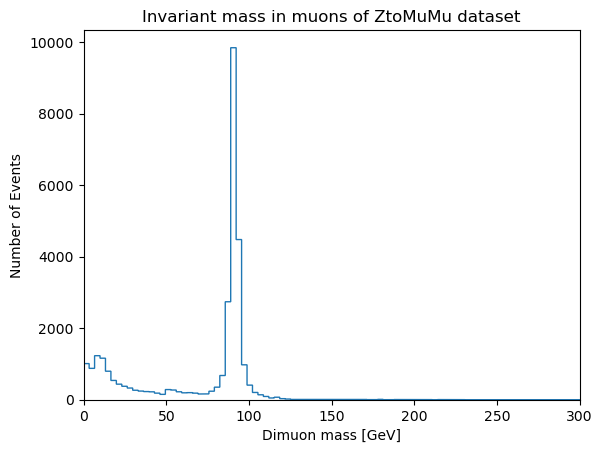

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline



plt.hist(dm_imass, bins='auto', histtype='step', fill=False)  # arguments are passed to np.histogram
plt.title("Invariant mass in muons of ZtoMuMu dataset")
plt.xlim([0,300])
plt.xlabel('Dimuon mass [GeV]')
plt.ylabel('Number of Events')
plt.show()

### Generator level particles invariant mass

In [49]:
numbergen = params['Zmuons']['numGenPart']
gen_pt=params['Zmuons']['GenPart_pt']
gen_mId=params['Zmuons']['GenPart_motherId']
gen_pt=params['Zmuons']['GenPart_pt']
gen_eta=params['Zmuons']['GenPart_eta']
gen_phi=params['Zmuons']['GenPart_phi']

In [50]:
numbergen = np.array(numbergen)
index_digen = np.where(numbergen >= 2)[0]

In [51]:
index_digen_z=[]
for i in index_digen:
    if(gen_mId[i][0]==13 and gen_mId[i][1]==-13):
        index_digen_z.append(i)

In [52]:
dm_imass_1=[]

for i in index_digen_z:
    dm_imass_1.append((2*gen_pt[i][0]*gen_pt[i][1]*(np.cosh(gen_eta[i][0]-gen_eta[i][1])-np.cos(gen_phi[i][0]-gen_phi[i][1])))**(1/2))
    

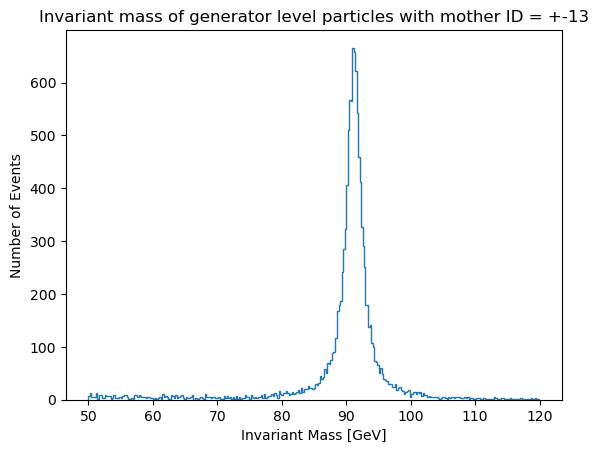

In [53]:
plt.hist(dm_imass_1, bins='auto', histtype='step', fill=False)  # arguments are passed to np.histogram
plt.title("Invariant mass of generator level particles with mother ID = +-13")
#plt.xlim([0,150])
plt.xlabel('Invariant Mass [GeV]')
plt.ylabel('Number of Events')
plt.show()

### Script (kind of) for the generation of colission images

In [54]:
muonspjets=np.intersect1d(index_dimuon, index_jet)

In [55]:
c=0.1
cm=0.25
a_1=0.4
my_dpi=96
angle = np.linspace(0,2*np.pi,125)
fig, ax = plt.subplots(figsize=(244/my_dpi, 244/my_dpi), dpi=my_dpi)

for i in muonspjets:  

    muonfill = muon_ch[i][0] == 1
    muonfill2 = muon_ch[i][1] == 1
  
    radius = cm*np.log(muon_pt[i][0])  #muon1
    radius_1 = cm*np.log(muon_pt[i][1]) #muon2 
    radius_2 = c*np.log(met_pt[i])   #met
    radius_3 = c*np.log(jet_pt[i][0])   #jet    

    x = radius * np.cos( angle )+ muon_eta[i][0]*a_1   #muon1 
    y = radius * np.sin( angle ) + muon_phi[i][0]*a_1  #muon1 
 
    x_1 = radius_1 * np.cos( angle )+ muon_eta[i][1]*a_1   #muon2
    y_1 = radius_1 * np.sin( angle ) + muon_phi[i][1]*a_1   #muon2 

    x_2 = radius_2 * np.cos( angle )+ 0                 #met 
    y_2 = radius_2 * np.sin( angle ) + met_phi[i]*a_1   #met
    
    x_3 = radius_3 * np.cos( angle )+ jet_eta[i][0]*a_1   #jet1 
    y_3 = radius_3 * np.sin( angle ) + jet_phi[i][0]*a_1  #jet1
 
    ax.clear()
   # jet2
    if len(jet_pt[i]) > 1:
        radius_4 = c*np.log(jet_pt[i][1])
        x_4 = radius_4 * np.cos( angle )+ jet_eta[i][1]*a_1   #jet2 
        y_4 = radius_4 * np.sin( angle ) + jet_phi[i][1]*a_1  #jet2
        plt.plot(x_4, y_4,'-,b')

    #jet 3
    if len(jet_pt[i]) > 2:
        radius_5 = c*np.log(jet_pt[i][2])
        x_5 = radius_5 * np.cos( angle )+ jet_eta[i][2]*a_1   #jet3 
        y_5 = radius_5 * np.sin( angle ) + jet_phi[i][2]*a_1  #jet3
        plt.plot(x_5, y_5,'-,b')

    #jet 4
    if len(jet_pt[i]) > 3:
        radius_6 = c*np.log(jet_pt[i][3])
        x_6 = radius_6 * np.cos( angle )+ jet_eta[i][3]*a_1   #jet4 
        y_6 = radius_6 * np.sin( angle ) + jet_phi[i][3]*a_1  #jet4
        plt.plot(x_6, y_6,'-,b')

        
    plt.plot(x,y,'-,r', lw=muonfill+1)
    plt.plot(x_1,y_1,'-,r',lw=muonfill2+1)
    plt.plot(x_2, y_2,'-,k')
    plt.plot(x_3, y_3,'-,b')   

    plt.xlim([-np.pi,np.pi])
    plt.ylim([-np.pi,np.pi])
    plt.axis('off')
    ax.set_aspect('equal', adjustable='box')
    plt.xlabel('η', fontsize=25)
    plt.ylabel('ϕ',fontsize=25, rotation=0)
    plt.tight_layout()
    plt.savefig("DESIREDPATH/IMAGENAME_{}".format(i))
    
plt.close(fig)

'\nc=0.1\ncm=0.25\na_1=0.4\nmy_dpi=96\nangle = np.linspace(0,2*np.pi,125)\nfig, ax = plt.subplots(figsize=(244/my_dpi, 244/my_dpi), dpi=my_dpi)\n\nfor i in muonspjets:  \n\n    muonfill = muon_ch[i][0] == 1\n    muonfill2 = muon_ch[i][1] == 1\n  \n    radius = cm*np.log(muon_pt[i][0])  #muon1\n    radius_1 = cm*np.log(muon_pt[i][1]) #muon2 \n    radius_2 = c*np.log(met_pt[i])   #met\n    radius_3 = c*np.log(jet_pt[i][0])   #jet    \n\n    x = radius * np.cos( angle )+ muon_eta[i][0]*a_1   #muon1 \n    y = radius * np.sin( angle ) + muon_phi[i][0]*a_1  #muon1 \n \n    x_1 = radius_1 * np.cos( angle )+ muon_eta[i][1]*a_1   #muon2\n    y_1 = radius_1 * np.sin( angle ) + muon_phi[i][1]*a_1   #muon2 \n\n    x_2 = radius_2 * np.cos( angle )+ 0                 #met \n    y_2 = radius_2 * np.sin( angle ) + met_phi[i]*a_1   #met\n    \n    x_3 = radius_3 * np.cos( angle )+ jet_eta[i][0]*a_1   #jet1 \n    y_3 = radius_3 * np.sin( angle ) + jet_phi[i][0]*a_1  #jet1\n \n    ax.clear()\n   # jet2\n